In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# Шлях до файлу на Google Drive
file_path = '/content/drive/My Drive/train.csv'

# Зчитування CSV-файлів
df = pd.read_csv('/content/drive/My Drive/train.csv')

Mounted at /content/drive


In [4]:
# Перевірка даних
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
# Пропуски відсутні
df.isnull().any()

,0
id,False
comment_text,False
toxic,False
severe_toxic,False
obscene,False
threat,False
insult,False
identity_hate,False


In [7]:
# Створення нової колонки для позначення нетоксичних коментарів
df['non_toxic'] = 1 - df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].max(axis=1)

In [9]:
# Підрахунок кількості коментарів для кожної категорії токсичності
category_counts = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'non_toxic']].sum()
# Виведення підрахунків
print(category_counts)

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
non_toxic        143346
dtype: int64


<ipython-input-10-12e9c0675f0a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


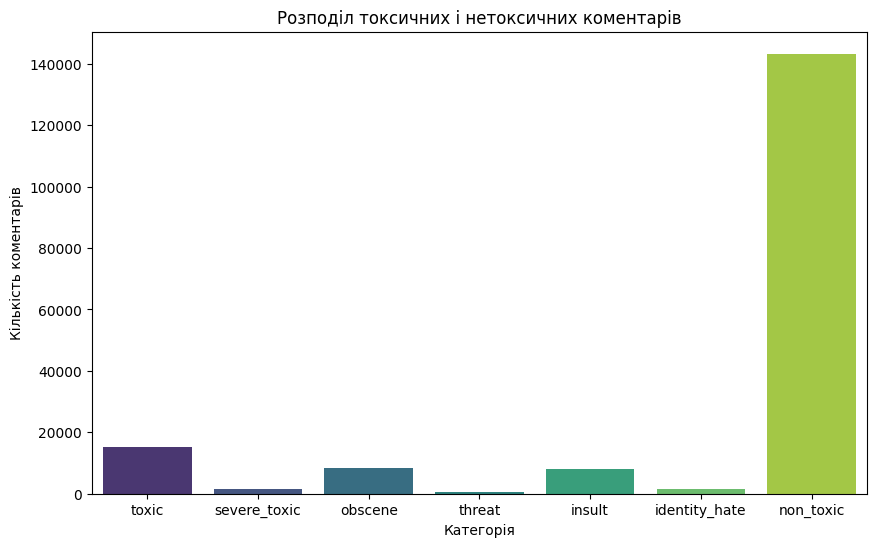

In [10]:
# Uрафік для візуалізації розподілу
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Розподіл токсичних і нетоксичних коментарів')
plt.xlabel('Категорія')
plt.ylabel('Кількість коментарів')
plt.show()

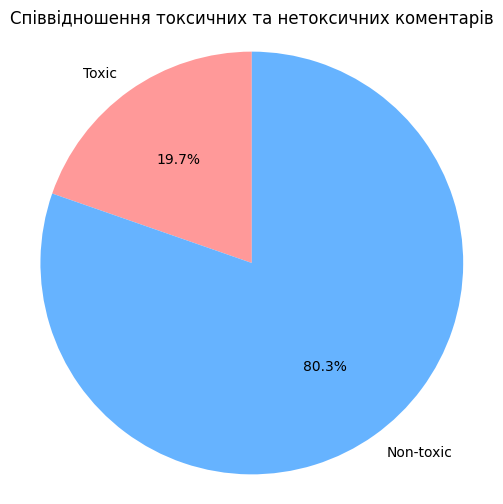

In [11]:
# Створення графіка для відображення співвідношення токсичних і нетоксичних коментарів
plt.figure(figsize=(6, 6))
labels = ['Toxic', 'Non-toxic']
sizes = [df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum().sum(), df['non_toxic'].sum()]
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Співвідношення токсичних та нетоксичних коментарів')
plt.axis('equal')
plt.show()

In [14]:
# Розрахунок співвідношення кожної категорії токсичних коментарів
category_counts = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
total_toxic_comments = category_counts.sum()
category_percentages = (category_counts / total_toxic_comments) * 100

<ipython-input-16-23e48d9a2a49>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_percentages.index, y=category_percentages.values, palette="plasma")


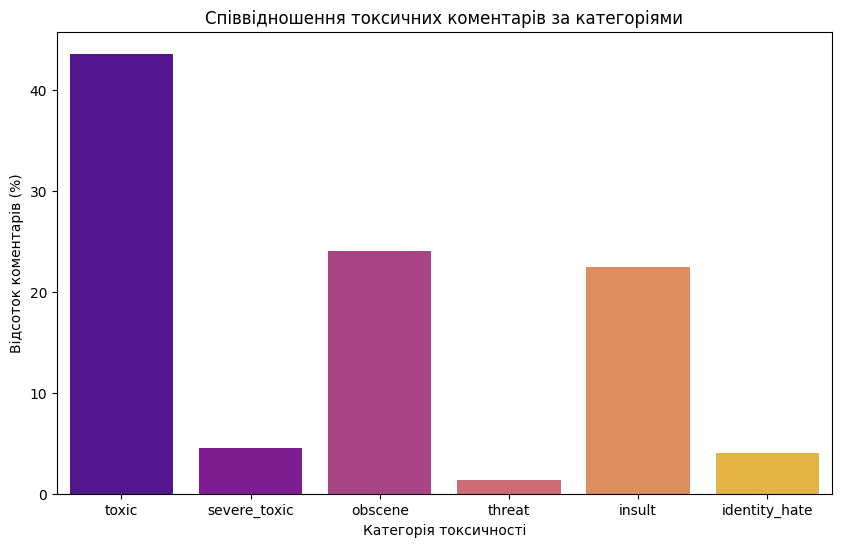

In [16]:
# Візуалізація співвідношень у вигляді бар-графіку
plt.figure(figsize=(10, 6))
sns.barplot(x=category_percentages.index, y=category_percentages.values, palette="plasma")
plt.title('Співвідношення токсичних коментарів за категоріями')
plt.xlabel('Категорія токсичності')
plt.ylabel('Відсоток коментарів (%)')
plt.show()


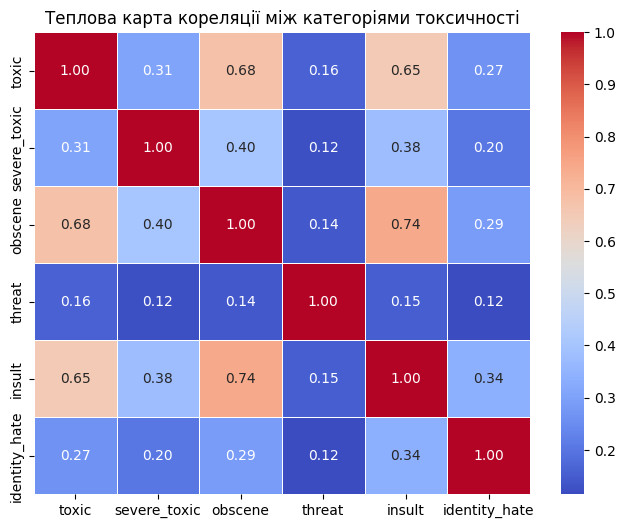

In [17]:
# Створення матриці кореляції
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
correlation_matrix = df[toxicity_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Теплова карта кореляції між категоріями токсичності')
plt.show()

In [18]:
# Очистка тексту
import re

def clean_text(text):
    text = text.replace('\n', ' ')
    text = re.sub(r"[^a-zA-Z0-9\s!']", ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip().lower()

df['comment_text'] = df['comment_text'].apply(clean_text)

df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,non_toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,hey man i'm really not trying to edit war it's...,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,more i can't make any real suggestions on impr...,0,0,0,0,0,0,1
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0,1
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,1
159568,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0,0,0,0,0,0,1
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,1


In [19]:
from wordcloud import WordCloud

In [20]:
# Візуалізація розподілу слів між категоріями за допомогою WordCloud

# Функція для генерації та візуалізації
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

In [24]:
# Створення тексту для кожної категорії
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
category_texts = {}

non_toxic_text = ' '.join(df[(df[categories].sum(axis=1) == 0)]['comment_text'])

for category in categories:
    category_texts[category] = ' '.join(df[df[category] == 1]['comment_text'])


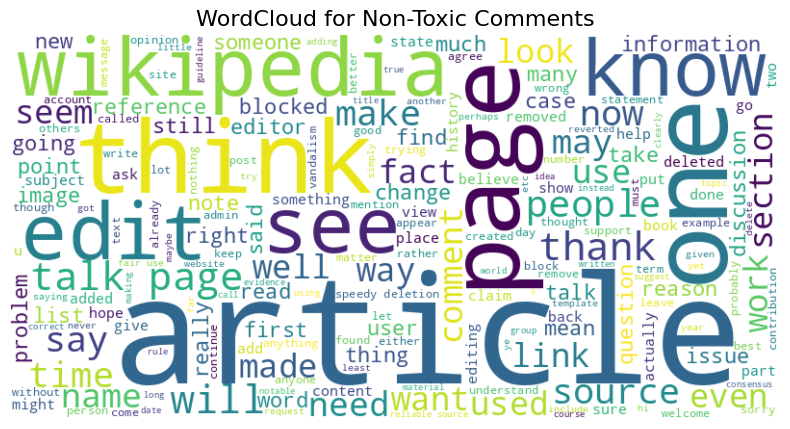

In [25]:
# Візуалізація для нетоксичних коментарів
plot_wordcloud(non_toxic_text, 'WordCloud for Non-Toxic Comments')

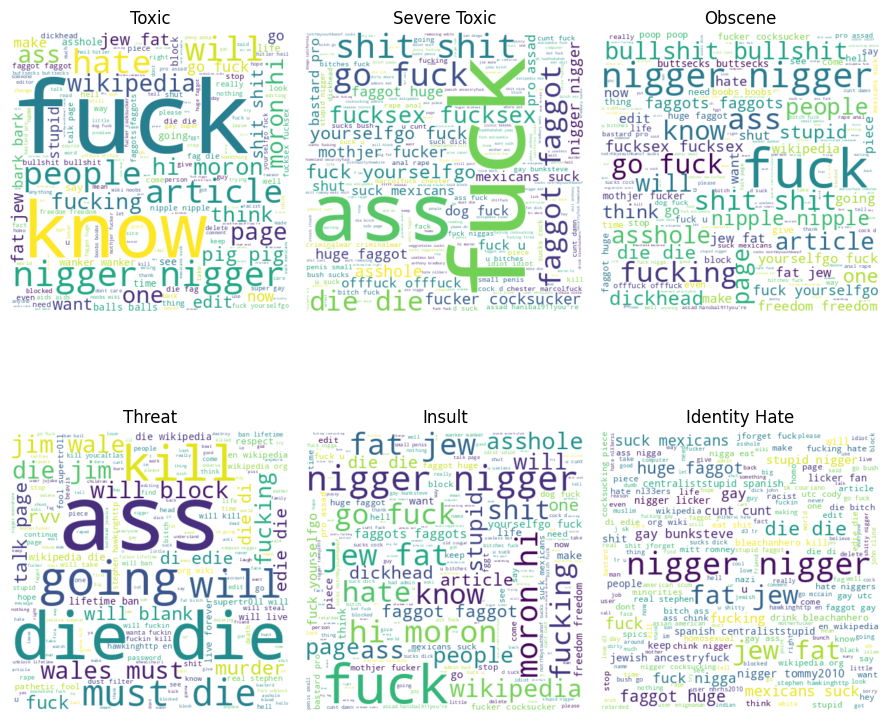

In [32]:
# Функція для створення word cloud
def generate_wordcloud(text, title, ax):
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title)
    ax.axis('off')

fig, axes = plt.subplots(2, 3, figsize=(9, 9))

generate_wordcloud(' '.join(df[df['toxic'] == 1]['comment_text']), 'Toxic', axes[0, 0])
generate_wordcloud(' '.join(df[df['severe_toxic'] == 1]['comment_text']), 'Severe Toxic', axes[0, 1])
generate_wordcloud(' '.join(df[df['obscene'] == 1]['comment_text']), 'Obscene', axes[0, 2])
generate_wordcloud(' '.join(df[df['threat'] == 1]['comment_text']), 'Threat', axes[1, 0])
generate_wordcloud(' '.join(df[df['insult'] == 1]['comment_text']), 'Insult', axes[1, 1])
generate_wordcloud(' '.join(df[df['identity_hate'] == 1]['comment_text']), 'Identity Hate', axes[1, 2])

plt.tight_layout()
plt.show()